# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

Don't worry if none of these make sense now, we're going to go through each.

## How you can use this notebook

You can read through the descriptions and the code (it should all run), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Create Feaures
x = np.linspace(5, 15, 10)
x

array([ 5.        ,  6.11111111,  7.22222222,  8.33333333,  9.44444444,
       10.55555556, 11.66666667, 12.77777778, 13.88888889, 15.        ])

In [ ]:
y = x + 10
y = np.array(y)
y

array([15.        , 16.11111111, 17.22222222, 18.33333333, 19.44444444,
       20.55555556, 21.66666667, 22.77777778, 23.88888889, 25.        ])

In [ ]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

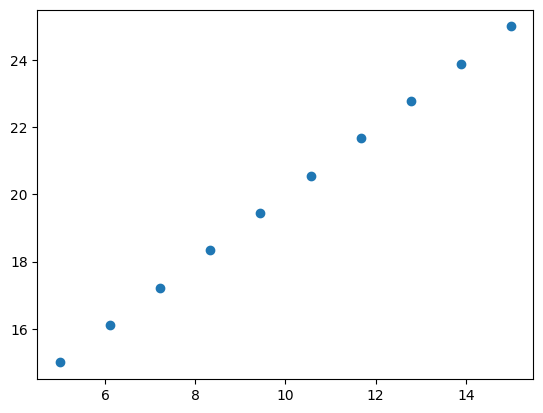

In [ ]:
plt.scatter(x,y)
plt.show()

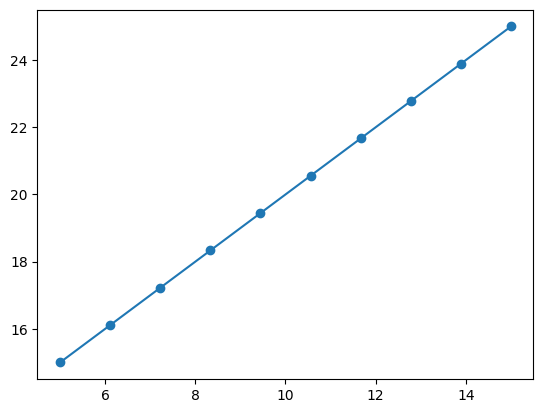

In [ ]:
plt.plot(x, y, 'o-')
plt.show()

In [ ]:
##Lets llok at house prediction input and output
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = house_info.shape
output_shape = house_price.shape
input_shape, output_shape

(TensorShape([3]), TensorShape([1]))

In [ ]:
## how about input and output shape for our x and y data
x.shape, y.shape

((10,), (10,))

Doesn't seem right because each value of x is individual input and each value of y is respective output

In [ ]:
x[0], y[0]

(5.0, 15.0)

In [ ]:
#what the shape of this single input and output
x[0].shape, y[0].shape

((), ())

In [ ]:
x[0].ndim, y[0].ndim

(0, 0)

**0 dimension ???**, thats because our input and output here are simply scalars which basically don' have any dimension or direction

In [ ]:
#convert numpy array to tensor
X=tf.constant(x)
X

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([ 5.        ,  6.11111111,  7.22222222,  8.33333333,  9.44444444,
       10.55555556, 11.66666667, 12.77777778, 13.88888889, 15.        ])>

In [ ]:
y = tf.constant(y)
y

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([15.        , 16.11111111, 17.22222222, 18.33333333, 19.44444444,
       20.55555556, 21.66666667, 22.77777778, 23.88888889, 25.        ])>

In [ ]:
X.shape, y.shape

(TensorShape([10]), TensorShape([10]))

In [ ]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with tensorflow

1. Creating a model

In [ ]:
tf.random.set_seed(42)

#Sequential API
model = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1)), #expand dims
          tf.keras.layers.Dense(1)
])

In [ ]:
##Alternate way of writing Sequential model
# model=tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [ ]:
model.fit(X, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 465ms/step - loss: 34.6712 - mae: 34.6712
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 34.6601 - mae: 34.6601
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 34.6492 - mae: 34.6492
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 34.6382 - mae: 34.6382
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 34.6272 - mae: 34.6272
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 34.6162 - mae: 34.6162
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 34.6052 - mae: 34.6052
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 34.5942 - mae: 34.5942
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 34.5832 - mae: 34.5832
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 34.5722 - mae: 34.5722


In [ ]:
model.predict([7.]) ## expected 17

1/1 [==============================] - 0s 69ms/step


array([[-10.189804]], dtype=float32)

In [ ]:
model.evaluate(X, y)

1/1 [==============================] - 0s 98ms/step - loss: 34.5611 - mae: 34.5611


[34.56114959716797, 34.56114959716797]

## Train for 100 epochs

In [ ]:
#Sequential API
model = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1), input_shape=X.shape), #expand dims
          tf.keras.layers.Dense(1)
])

print(model.summary())

model.compile(loss='mae', optimizer='sgd', metrics=['mae'])

model.fit(X, y, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 10, 1)             0         
                                                                 
 dense_1 (Dense)             (None, 10, 1)             2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 [==============================] - 0s 236ms/step - loss: 3.3968 - mae: 3.3968
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 2.7838 - mae: 2.7838
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 2.6560 - mae: 2.6560
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 2.6267 - mae: 2.6267
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 2.5973 - m

In [ ]:
model.evaluate(X,y)

1/1 [==============================] - 0s 80ms/step - loss: 2.5117 - mae: 2.5117


[2.511737108230591, 2.511737108230591]

In [ ]:
model.predict([13])

1/1 [==============================] - 0s 46ms/step


array([[24.311676]], dtype=float32)

##Add more hidden layers

In [ ]:
#Sequential API
model = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1), input_shape=X.shape), #expand dims
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(1),
])

#print(model.summary())

model.compile(loss='mae', optimizer='sgd', metrics=['mae'])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 283ms/step - loss: 23.6807 - mae: 23.6807
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 21.9107 - mae: 21.9107
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 20.2808 - mae: 20.2808
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 18.7299 - mae: 18.7299
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 17.2959 - mae: 17.2959
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 15.8100 - mae: 15.8100
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 14.2262 - mae: 14.2262
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4805 - mae: 12.4805
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4724 - mae: 10.4724
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1497 - mae: 8.1497
Epoch 11/100
1/1 [==============================] - 0s 6ms/

In [ ]:
model.evaluate(X,y)

1/1 [==============================] - 0s 81ms/step - loss: 2.3622 - mae: 2.3622


[2.362151622772217, 2.362151622772217]

In [ ]:
model.predict([12.]) #expected +10

1/1 [==============================] - 0s 45ms/step


array([[22.203901]], dtype=float32)

Using Adam optimizer

In [ ]:
#Sequential API
model_3 = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1), input_shape=X.shape), #expand dims
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(1),
])

#print(model_3.summary())

model_3.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])

model_3.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 381ms/step - loss: 17.7407 - mae: 17.7407
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 17.6150 - mae: 17.6150
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 17.4893 - mae: 17.4893
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 17.3636 - mae: 17.3636
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 17.2379 - mae: 17.2379
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 17.1122 - mae: 17.1122
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 16.9865 - mae: 16.9865
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 16.8608 - mae: 16.8608
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 16.7351 - mae: 16.7351
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 16.6094 - mae: 16.6094
Epoch 11/1000
1/1 [============================

In [ ]:
model_3.evaluate(X,y)

1/1 [==============================] - 0s 158ms/step - loss: 0.8872 - mae: 0.8872


[0.8872185945510864, 0.8872185945510864]

In [ ]:
model_3.predict([10])

1/1 [==============================] - 0s 79ms/step


array([[19.522894]], dtype=float32)

Reduced learning_rate from 0.001 to 0.01

In [ ]:
#Sequential API
model_4 = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1), input_shape=X.shape), #expand dims
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(1),
])

model_4.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

model_4.fit(X, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 497ms/step - loss: 22.8331 - mae: 22.8331
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 21.5240 - mae: 21.5240
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 20.2315 - mae: 20.2315
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 18.9465 - mae: 18.9465
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 17.6641 - mae: 17.6641
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 16.3833 - mae: 16.3833
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 15.1182 - mae: 15.1182
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 13.8545 - mae: 13.8545
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 12.5831 - mae: 12.5831
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 11.3003 - mae: 11.3003
Epoch 11/200
1/1 [==============================] - 0s 9m

In [ ]:
model_4.evaluate(X, y)

1/1 [==============================] - 0s 128ms/step - loss: 0.0487 - mae: 0.0487


[0.04867744445800781, 0.04867744445800781]

In [ ]:
model_4.predict([1.])

1/1 [==============================] - 0s 67ms/step


array([[10.620053]], dtype=float32)

In [ ]:
## Make a bigger dataaset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X +10

In [ ]:
X.shape, y.shape

(TensorShape([50]), TensorShape([50]))

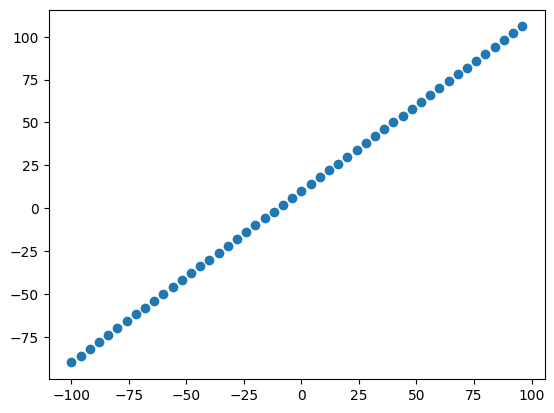

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
split_size = int(len(X) * 0.8)
split_size

40

In [ ]:
x_train = X[:40]
x_test = X[40:]

y_train = y[:40]
y_test = y[40:]

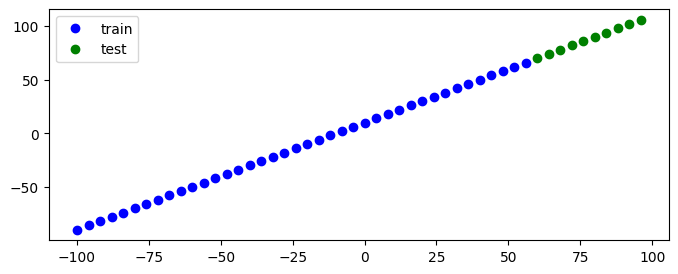

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'go')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
x=[1,2,3,4]
tf.expand_dims(x, -1).shape[1]

1

In [ ]:
#Sequential API
model_ = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1), input_shape=x_train.shape), #expand dims
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(1),
])

model_.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

history_ = model_.fit(x_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 6ms/step - loss: 47.3940 - mae: 47.3940
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 38.7302 - mae: 38.7302
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 30.5637 - mae: 30.5637
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 22.4168 - mae: 22.4168
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 14.6996 - mae: 14.6996
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 7.7092 - mae: 7.7092
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 6.6756 - mae: 6.6756
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 9.8243 - mae: 9.8243
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 10.2844 - mae: 10.2844
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 8.1862 - mae: 8.1862
Epoch 11/200
2/2 [==============================] - 0s 5ms/step - l

In [ ]:
model_.evaluate(x_test, y_test)

1/1 [==============================] - 0s 463ms/step - loss: 0.2184 - mae: 0.2184


[0.21837463974952698, 0.21837463974952698]

In [ ]:
t = model_.evaluate(x_test, y_test)[0]

1/1 [==============================] - 0s 72ms/step - loss: 0.2184 - mae: 0.2184


In [ ]:
t

0.21837463974952698

In [ ]:
model_.predict([1, 10, 23, 2])

1/1 [==============================] - 0s 113ms/step


array([[10.856833],
       [19.933977],
       [32.881165],
       [11.870036]], dtype=float32)

In [ ]:
model_.summary() # note the input shape (40,1), and output shape (40,1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 40, 1)             0         
                                                                 
 dense_8 (Dense)             (None, 40, 64)            128       
                                                                 
 dense_9 (Dense)             (None, 40, 1)             65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


Input shape as None

In [ ]:
#Sequential API
model_1 = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1), input_shape=[None]), #expand dims
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(1),
])

model_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

history_1 = model_1.fit(x_train, y_train, epochs=5)

Epoch 1/5
2/2 [==============================] - 3s 7ms/step - loss: 38.5490 - mae: 38.5490
Epoch 2/5
2/2 [==============================] - 0s 6ms/step - loss: 30.3885 - mae: 30.3885
Epoch 3/5
2/2 [==============================] - 0s 10ms/step - loss: 22.7121 - mae: 22.7121
Epoch 4/5
2/2 [==============================] - 0s 6ms/step - loss: 15.2206 - mae: 15.2206
Epoch 5/5
2/2 [==============================] - 0s 7ms/step - loss: 8.3599 - mae: 8.3599


In [ ]:
model_1.summary() # note the input shape (None,1), and output shape (None,1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_6 (Lambda)           (None, None, 1)           0         
                                                                 
 dense_10 (Dense)            (None, None, 64)          128       
                                                                 
 dense_11 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate_model(num_dense_layers):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1), input_shape=[None]))
    for i in range(num_dense_layers):
        model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1))

    return model

In [ ]:
import pandas as pd
def fit_models_with_added_layers(x_train, y_train, epochs=5, num_dense_layers=1):
    test_mae = []
    for i in range(num_dense_layers):
        print('='*80)
        print(f'MODEL with {i} hidden_dense_layers')
        print('='*80)
        model = generate_model(i)
        model._name=f'Model_{i}' #not recommended to rename this way
        model.summary()
        model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])
        print(f'Model {i} Training...')
        model.fit(x_train, y_train, epochs=epochs)
        print(f'Model {i} Evaluation...')
        eval = model.evaluate(x_test, y_test)
        mae = eval[0]
        test_mae.append(mae)
        print()
        print()
    print()
    result_df = pd.DataFrame(test_mae,index=[f'Model_{i}' for i in range(num_dense_layers)], columns=['Test_MAE'])
    return result_df

In [ ]:
tf.keras.backend.clear_session()

#Define num_dense_layers
num_dense_layers=5
num_epochs = 10

# Generate model and fit data
mae_df = fit_models_with_added_layers(x_train, y_train, num_epochs, num_dense_layers)

MODEL with 0 hidden_dense_layers
Model: "Model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 dense (Dense)               (None, None, 1)           2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model 0 Training...
Epoch 1/10
2/2 [==============================] - 1s 8ms/step - loss: 13.0836 - mae: 13.0836
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 12.3562 - mae: 12.3562
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 11.6314 - mae: 11.6314
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 10.9446 - mae: 10.9446
Epoch 5/10
2/2 [====================

In [ ]:
mae_df

,Test_MAE
Model_0,20.289057
Model_1,2.873386
Model_2,4.281035
Model_3,25.867838
Model_4,32.033043


plot_model

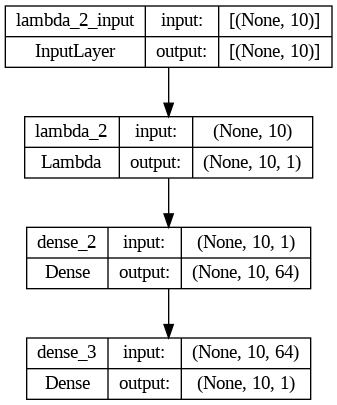

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Visualize Predictions

- it is good idea to visualize data, model, training, and predictions

In [ ]:
#make some prediction using last model from the iterative run
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 64ms/step


array([[107.636444],
       [114.75577 ],
       [121.87511 ],
       [128.99443 ],
       [136.11375 ],
       [143.23308 ],
       [150.3524  ],
       [157.47173 ],
       [164.59105 ],
       [171.71037 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_prediction(x_train, y_train, x_test, y_test, y_pred):
    plt.figure(figsize=(8,3))
    plt.scatter(x_train, y_train, c='b', label='train_data')
    plt.scatter(x_test, y_test, c='g', label='test_data')
    plt.scatter(x_test, y_pred, c='r', label='predictions')
    plt.plot(x_test, y_pred)
    plt.xlabel('Input data')
    plt.ylabel('Target')
    plt.show()

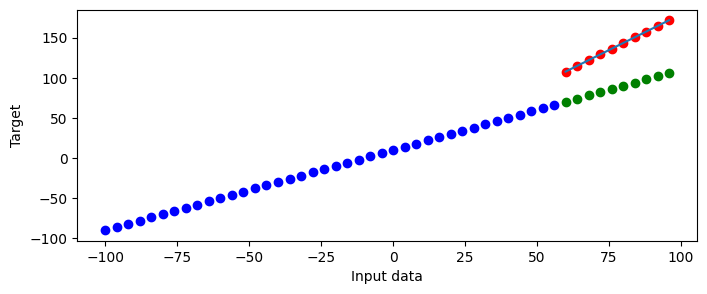

In [ ]:
plot_prediction(x_train, y_train, x_test, y_test, y_pred)

Predictions using model_

In [ ]:
#Sequential API
model_ = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, -1), input_shape=x_train.shape), #expand dims
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(1),
])

model_.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

history_ = model_.fit(x_train, y_train, epochs=200, verbose=0)

In [ ]:
#make some prediction
y_pred = model_.predict(x_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 69.292786],
       [ 73.2434  ],
       [ 77.19402 ],
       [ 81.14464 ],
       [ 85.09526 ],
       [ 89.04588 ],
       [ 92.996506],
       [ 96.94713 ],
       [100.897736],
       [104.84841 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
model_.evaluate(x_test, y_test)

1/1 [==============================] - 0s 134ms/step - loss: 0.9294 - mae: 0.9294


[0.9294227361679077, 0.9294227361679077]

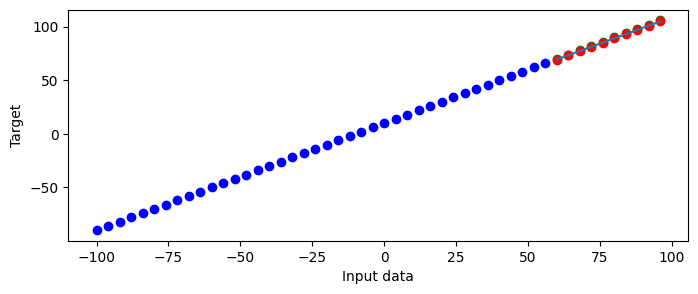

In [ ]:
plot_prediction(x_train, y_train, x_test, y_test, y_pred)

## Evaluating model with regression evaluation metrics
- mse
- mae
- huber (combination of mae and mse)

In [ ]:
## code mae
def mae(y_true, y_pred):
    n = len(y_true)
    error = np.abs(y_true - y_pred)
    #print(error)
    sum_err = np.sum(error)
    #print(sum_err)
    return sum_err/n

In [ ]:
def mse(y_true, y_pred):
    n = len(y_true)
    error = y_true - y_pred
    sum_err = np.sum(error ** 2)
    return sum_err/n

In [ ]:
type(y_test), y_test.shape, y_test

(tensorflow.python.framework.ops.EagerTensor,
 TensorShape([10]),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
y_pred.dtype, y_pred.shape

(dtype('float32'), (10, 1))

In [ ]:
y_pred = np.squeeze(y_pred)

In [ ]:
y_pred

array([ 69.292786,  73.2434  ,  77.19402 ,  81.14464 ,  85.09526 ,
        89.04588 ,  92.996506,  96.94713 , 100.897736, 104.84841 ],
      dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#cast to float
y_test = np.array(y_test, dtype='float32')

In [ ]:
y_test - y_pred

array([0.70721436, 0.7565994 , 0.80597687, 0.85536194, 0.9047394 ,
       0.9541168 , 1.0034943 , 1.0528717 , 1.1022644 , 1.1515884 ],
      dtype=float32)

In [ ]:
#compute mae
print(f"MAE computed using tf method: {tf.keras.losses.mean_absolute_error(y_test, y_pred)}")
print(f"MAE computed using defined custom function:{mae(y_test, y_pred)}")

MAE computed using tf method: 0.9294227361679077
MAE computed using defined custom function:0.9294227600097656


In [ ]:
#compute mse
print(f"MSE computed using tf method: {tf.keras.losses.mean_squared_error(y_test, y_pred)}")
print(f"MSE computed using defined custom function:{mse(y_test, y_pred)}")

MSE computed using tf method: 0.8839412927627563
MSE computed using defined custom function:0.8839411735534668


In [ ]:
# function to compute mae
def tf_mae(y_true, y_pred):
    y_pred = tf.squeeze(y_pred)
    return tf.keras.losses.mean_absolute_error(y_true, y_pred)

# function to compute mse
def tf_mse(y_true, y_pred):
    y_pred = tf.squeeze(y_pred)
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

## Running experiments to improve model
 - Get more data
 - make a more complex model
 - train for longer

 Lets do three modelling experiment
 - 1 layer 100 epochs
 - 2 layer 100 epochs
 - 3 layer 500 epochs

In [ ]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
x_train.shape[0]

40

In [ ]:
model1 = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, -1)),
          tf.keras.layers.Dense(1)
])

model1.compile(loss='mae', optimizer='sgd', metrics=['mae'])

model1.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9823 - mae: 15.9823
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9283 - mae: 12.9283
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.5617 - mae: 11.5617
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.3997 - mae: 9.3997
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2845 - mae: 10.2845
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5325 - mae: 9.5325
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6552 - mae: 8.6552
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0473 - mae: 9.0473
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.9719 - mae: 18.9719
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2337 - mae: 10.2337
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 19ms/step


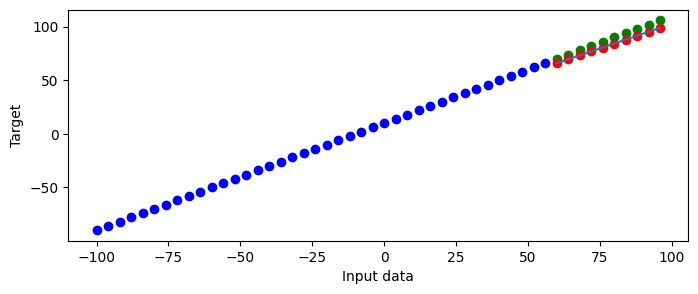

In [ ]:
y_pred1 = model1.predict(y_test)
plot_prediction(x_train, y_train, x_test, y_test, y_pred1)

In [ ]:
#model1 evaluation
mae1 = tf_mae(y_test, y_pred1)
mse1 = tf_mse(y_test, y_pred1)
mae1.numpy(), mse1.numpy()

(5.621595, 32.42294)

In [ ]:
#model2

model2 = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, -1)),
          tf.keras.layers.Dense(32),
          tf.keras.layers.Dense(1)
])

model2.compile(loss='mae', optimizer='sgd', metrics=['mae'])

model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 50.9087 - mae: 50.9087
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 27.3754 - mae: 27.3754
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 30.9961 - mae: 30.9961
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 16.8464 - mae: 16.8464
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 23.0515 - mae: 23.0515
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8336 - mae: 10.8336
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8660 - mae: 11.8660
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9441 - mae: 12.9441
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 34.0835 - mae: 34.0835
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 23.5286 - mae: 23.5286
Epoch 11/100
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 41ms/step


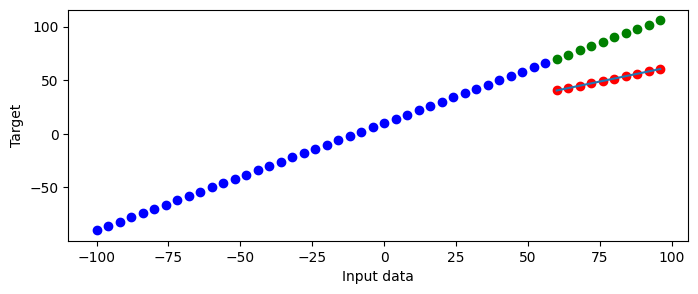

In [ ]:
y_pred2 = model2.predict(y_test)
plot_prediction(x_train, y_train, x_test, y_test, y_pred2)

In [ ]:
#model2 evaluation
mae2 = tf_mae(y_test, y_pred2)
mse2 = tf_mse(y_test, y_pred2)
mae2.numpy(), mse2.numpy()

(37.558132, 1436.5339)

In [ ]:
#model three
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, -1)),
          tf.keras.layers.Dense(32),
          tf.keras.layers.Dense(1)
])

model3.compile(loss='mae', optimizer='sgd', metrics=['mae'])

model3.fit(x_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 36.6277 - mae: 36.6277
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 29.0528 - mae: 29.0528
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 33.9779 - mae: 33.9779
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 28.2407 - mae: 28.2407
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 15.3517 - mae: 15.3517
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 12.1891 - mae: 12.1891
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4852 - mae: 11.4852
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2098 - mae: 11.2098
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 41.8316 - mae: 41.8316
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 29.0505 - mae: 29.0505
Epoch 11/500
2/2 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 25ms/step


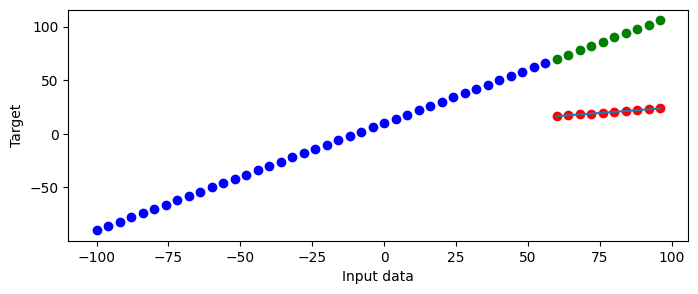

In [ ]:
y_pred3 = model3.predict(x_test)
plot_prediction(x_train, y_train, x_test, y_test, y_pred3)

In [ ]:
#model3 evaluation
mae3 = tf_mae(y_test, y_pred3)
mse3 = tf_mse(y_test, y_pred3)
mae3.numpy(), mse3.numpy()

(67.96053, 4703.0596)

## Comparing the results of our experiments

In [ ]:
# lets comprae result using dataframe
model_results = [['model1', mae1.numpy(), mse1.numpy()],
                 ['model2', mae2.numpy(), mse2.numpy()],
                 ['model3', mae3.numpy(), mse3.numpy()],]

all_results= pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model1,5.621595,32.422939
1,model2,37.558132,1436.533936
2,model3,67.960533,4703.059570


Model1 performed the best

In [ ]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_11 (Lambda)          (None, 1)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

tools:
- Tensorboard
- weights & baises

## Save a model

-two main format
  - SavedModel format
  - HDF5 format

In [ ]:
#SavedModelformat
model1.save('my_model')

In [ ]:
#HDF5 format
model1.save('my_model.h5')

## Load model

In [ ]:
#load SavedModel format model
model_1_saved = tf.keras.models.load_model('/content/my_model')
model_1_saved.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_11 (Lambda)          (None, 1)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ypred_1 = model1.predict(x_test)
y_pred_1_saved = model_1_saved.predict(x_test)

ypred_1 == y_pred_1_saved

1/1 [==============================] - 0s 41ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
tf_mae(y_test, ypred_1) == tf_mae(y_test, y_pred_1_saved)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
##load hdf5 model

model_1_hdf5 = tf.keras.models.load_model('/content/my_model.h5')
model_1_hdf5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_11 (Lambda)          (None, 1)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred1_hdf5 = model_1_hdf5.predict(x_test)
y_pred1_hdf5 == ypred_1

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Save and Download files from Google Colab

In [ ]:
## DOwnload using Google Colab files
from google.colab import files
#files.download('/content/my_model')

In [ ]:
# Download to GoogleDrive
!cp /content/my_model.h5 /content/drive/MyDrive/ColabNotebooks/udemy_tf

In [ ]:
!ls /content/drive/MyDrive/ColabNotebooks/udemy_tf

00_tensorflow_fundamentals.ipynb		  my_model.h5
01_neural_network_regression_in_tensorflow.ipynb


## A larger example

In [ ]:
#import data
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
y= insurance_one_hot.charges
y.shape

(1338,)

In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
X = insurance_one_hot.drop('charges', axis=1)
X.shape

(1338, 11)

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [ ]:
tf.random.set_seed=42

model_insurance = tf.keras.Sequential([
                    tf.keras.layers.Dense(1)
])

model_insurance.compile(loss='mae', optimizer='adam',metrics=['mae'])

model_insurance.fit(x_train, y_train, epochs=10)

Epoch 1/10
34/34 [==============================] - 1s 1ms/step - loss: 13318.5322 - mae: 13318.5322
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 13315.9863 - mae: 13315.9863
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 13313.4424 - mae: 13313.4424
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 13310.9004 - mae: 13310.9004
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 13308.3545 - mae: 13308.3545
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 13305.8037 - mae: 13305.8037
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 13303.2637 - mae: 13303.2637
Epoch 8/10
34/34 [==============================] - 0s 1ms/step - loss: 13300.7236 - mae: 13300.7236
Epoch 9/10
34/34 [==============================] - 0s 1ms/step - loss: 13298.1777 - mae: 13298.1777
Epoch 10/10
34/34 [==============================] - 0s 1ms/step - loss: 13295.6338 - mae: 

In [ ]:
model_insurance.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12916.6162 - mae: 12916.6162


[12916.6162109375, 12916.6162109375]

In [ ]:
y_train.mean(), y_train.median()

(13346.089736364485, 9575.4421)

In [ ]:
tf.random.set_seed=42

model_insurance1 = tf.keras.Sequential([
                    tf.keras.layers.Dense(64),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(1)
])

model_insurance1.compile(loss='mae', optimizer='adam',metrics=['mae'])

model_insurance1.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13246.9990 - mae: 13246.9990
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12961.6377 - mae: 12961.6377
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12320.2666 - mae: 12320.2666
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11059.8936 - mae: 11059.8936
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 9274.8086 - mae: 9274.8086
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7781.1528 - mae: 7781.1528
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7406.4414 - mae: 7406.4414
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7377.8110 - mae: 7377.8110
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7353.0181 - mae: 7353.0181
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7329.8281 - mae: 7

In [ ]:
model_insurance1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3732.3284 - mae: 3732.3284


[3732.328369140625, 3732.328369140625]

loss from mae to mse

In [ ]:
tf.random.set_seed=42

model_insurance2 = tf.keras.Sequential([
                    tf.keras.layers.Dense(64),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(1)
])

model_insurance2.compile(loss='mse', optimizer='adam',metrics=['mae'])

model_insurance2.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 321661664.0000 - mae: 13318.7178
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 315977472.0000 - mae: 13119.4023
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 303093696.0000 - mae: 12651.9775
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 277441216.0000 - mae: 11662.9893
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 237893920.0000 - mae: 10039.2363
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 191469984.0000 - mae: 8252.4912
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 153945488.0000 - mae: 7492.7266
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 135018480.0000 - mae: 8165.2261
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 130103816.0000 - mae: 8773.5938
Epoch 10/100
34/34 [==============================

In [ ]:
model_insurance2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 45687848.0000 - mae: 5161.9507


[45687848.0, 5161.95068359375]

mae to mse did not help

Adding more layer

In [ ]:
tf.random.set_seed=42

model_insurance3 = tf.keras.Sequential([
                    tf.keras.layers.Dense(64),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(1)
])

model_insurance3.compile(loss='mae', optimizer='adam',metrics=['mae'])

model_insurance3.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13231.3096 - mae: 13231.3096
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12448.3701 - mae: 12448.3701
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 9349.2754 - mae: 9349.2754
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7384.9263 - mae: 7384.9263
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7322.8818 - mae: 7322.8818
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7282.6084 - mae: 7282.6084
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7216.3008 - mae: 7216.3008
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7159.4414 - mae: 7159.4414
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7102.9546 - mae: 7102.9546
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7044.7524 - mae: 7044.

In [ ]:
model_insurance3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3256.5830 - mae: 3256.5830


[3256.5830078125, 3256.5830078125]

Train for longer

In [ ]:
tf.random.set_seed=42

model_insurance4 = tf.keras.Sequential([
                    tf.keras.layers.Dense(64),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(1)
])

model_insurance4.compile(loss='mae', optimizer='adam',metrics=['mae'])

model_insurance4.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13247.7119 - mae: 13247.7119
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12448.3418 - mae: 12448.3418
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 9296.1953 - mae: 9296.1953
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7431.2915 - mae: 7431.2915
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7360.2925 - mae: 7360.2925
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7313.9448 - mae: 7313.9448
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7249.2461 - mae: 7249.2461
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7190.9849 - mae: 7190.9849
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7130.9932 - mae: 7130.9932
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7068.9849 - mae: 7068.

In [ ]:
model_insurance4.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3161.9048 - mae: 3161.9048


[3161.90478515625, 3161.90478515625]

In [ ]:
tf.random.set_seed=42

model_insurance5 = tf.keras.Sequential([
                    tf.keras.layers.Dense(128),
                    tf.keras.layers.Dense(64),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(1)
])

model_insurance5.compile(loss='mae', optimizer='adam',metrics=['mae'])

history = model_insurance5.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 12881.7041 - mae: 12881.7041
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 8565.1182 - mae: 8565.1182
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7366.1812 - mae: 7366.1812
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7189.9258 - mae: 7189.9258
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7063.3818 - mae: 7063.3818
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6920.0645 - mae: 6920.0645
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6764.0493 - mae: 6764.0493
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6657.9507 - mae: 6657.9507
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6624.5366 - mae: 6624.5366
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6588.2109 - mae: 6588.21

In [ ]:
model_insurance5.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.9050 - mae: 3160.9050


[3160.905029296875, 3160.905029296875]

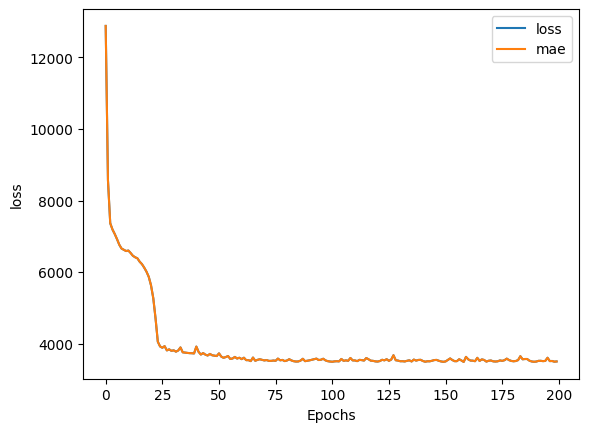

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

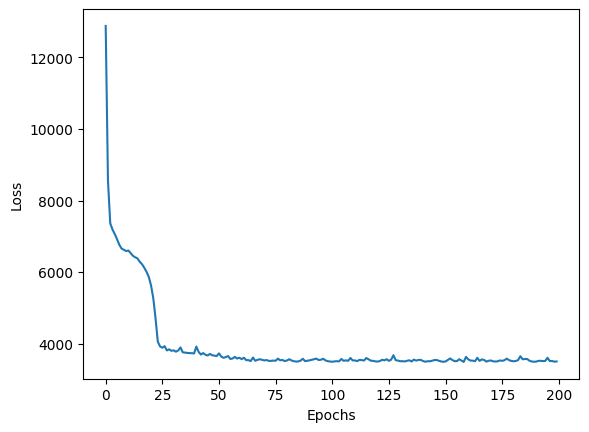

In [ ]:
n_epochs = range(200)
plt.plot(n_epochs, history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Implementing Early stopping in our insuarance model

In [ ]:
tf.random.set_seed=42

#define early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=2)

#define model
model_insurance6 = tf.keras.Sequential([
                    tf.keras.layers.Dense(128),
                    tf.keras.layers.Dense(64),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(32),
                    tf.keras.layers.Dense(1)
])

#compile model
model_insurance6.compile(loss='mae', optimizer='adam',metrics=['mae'])

history6 = model_insurance6.fit(x_train, y_train, epochs=500, callbacks=[early_stop])

Epoch 1/500
34/34 [==============================] - 1s 1ms/step - loss: 12938.0508 - mae: 12938.0508
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 8768.6797 - mae: 8768.6797
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 7405.9526 - mae: 7405.9526
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 7235.5161 - mae: 7235.5161
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7114.8979 - mae: 7114.8979
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 6985.8794 - mae: 6985.8794
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 6814.3320 - mae: 6814.3320
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 6663.0977 - mae: 6663.0977
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 6607.6289 - mae: 6607.6289
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 6560.5200 - mae: 6560.52

In [ ]:
model_insurance6.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.8423 - mae: 3169.8423


[3169.84228515625, 3169.84228515625]

Text(0, 0.5, 'Loss')

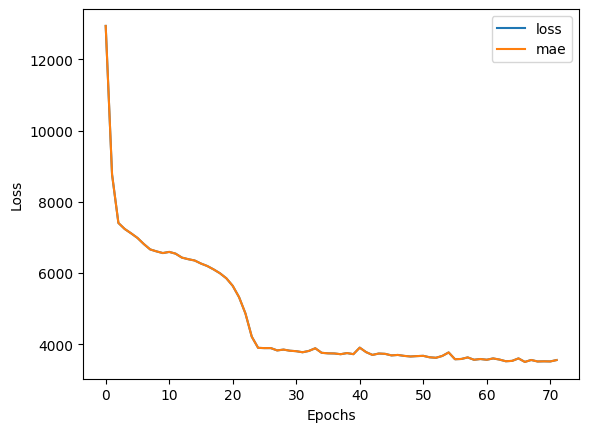

In [ ]:
pd.DataFrame(history6.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Preprocessing Data - Normalization, Standardization

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<Axes: ylabel='Frequency'>

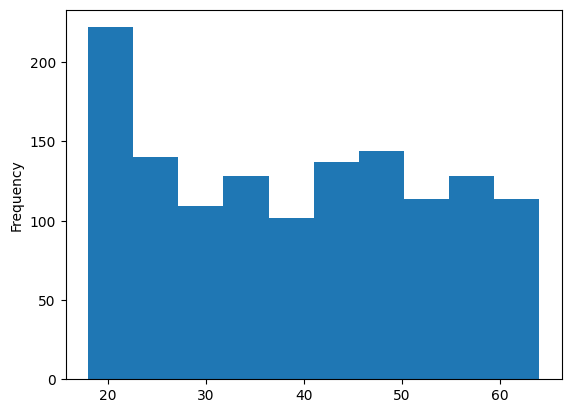

In [ ]:
X.age.plot(kind='hist')
# note if you standardize you may get a bell curve and you may loose on that beginning outlier.
# So Nomalization is prefered ove rstandardization

<Axes: ylabel='Frequency'>

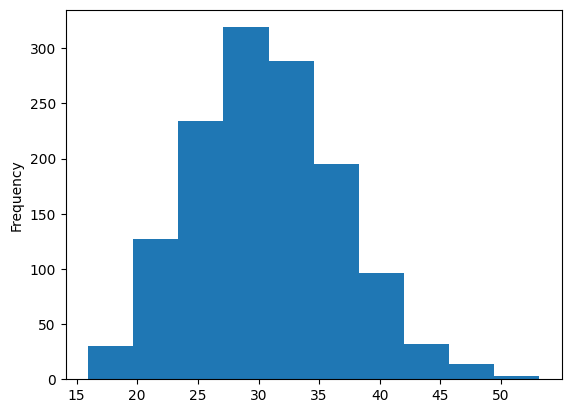

In [ ]:
X.bmi.plot(kind='hist')

In [ ]:
X.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a columntransformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['smoker', 'sex', 'region'])
)

#Create X, y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

## train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer
ct.fit(x_train)

# Transform data
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
x_train_normal.shape, x_test_normal.shape

((1070, 11), (268, 11))

In [ ]:
x_train_normal[:2]

array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [ ]:
type(x_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
tf.random.set_seed=42

# callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=2)

# Create a model
model_in = tf.keras.Sequential([
              tf.keras.layers.Dense(64),
              tf.keras.layers.Dense(32),
              tf.keras.layers.Dense(1),

])

# Compile model
model_in.compile(loss='mae', optimizer='adam',metrics=['mae'])


# Fit model
history_in = model_in.fit(x_train_normal, y_train, epochs=500, callbacks=[early_stop])


Epoch 1/500
34/34 [==============================] - 1s 1ms/step - loss: 13342.9736 - mae: 13342.9736
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 13330.2041 - mae: 13330.2041
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 13294.6562 - mae: 13294.6562
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13215.6875 - mae: 13215.6875
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 13071.5605 - mae: 13071.5605
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 12840.4385 - mae: 12840.4385
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 12501.1738 - mae: 12501.1738
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 12035.4697 - mae: 12035.4697
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 11447.1201 - mae: 11447.1201
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 10801.20

In [ ]:
#evaluate
model_in.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3160.6226 - mae: 3160.6226


[3160.62255859375, 3160.62255859375]

<Axes: >

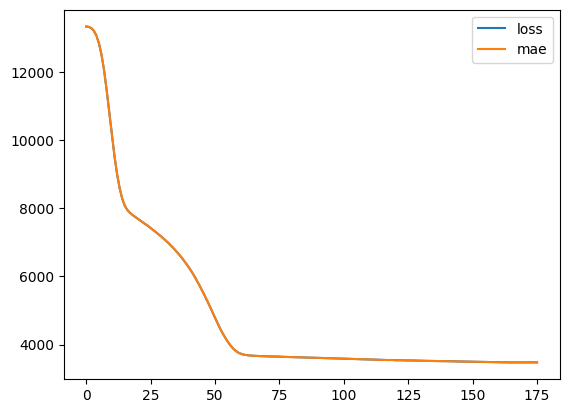

In [ ]:
pd.DataFrame(history_in.history).plot()

## Change Activation function

In [ ]:
tf.random.set_seed=42

# callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, verbose=2)

# Create a model
model_in_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dense(32, activation='relu'),
              tf.keras.layers.Dense(1),

])

# Compile model
model_in_1.compile(loss='mae', optimizer='adam',metrics=['mae'])


# Fit model
history_in_1 = model_in_1.fit(x_train_normal, y_train, epochs=1000, callbacks=[early_stop])


Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13344.1191 - mae: 13344.1191
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 13319.0889 - mae: 13319.0889
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 13146.5254 - mae: 13146.5254
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 12442.2061 - mae: 12442.2061
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 10683.3818 - mae: 10683.3818
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 8659.3369 - mae: 8659.3369
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 7926.6719 - mae: 7926.6719
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 7751.5532 - mae: 7751.5532
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 7582.6748 - mae: 7582.6748
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 7404.7

In [ ]:
#EValuate
model_in_1.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1740.4867 - mae: 1740.4867


[1740.4866943359375, 1740.4866943359375]

Text(0, 0.5, 'Loss')

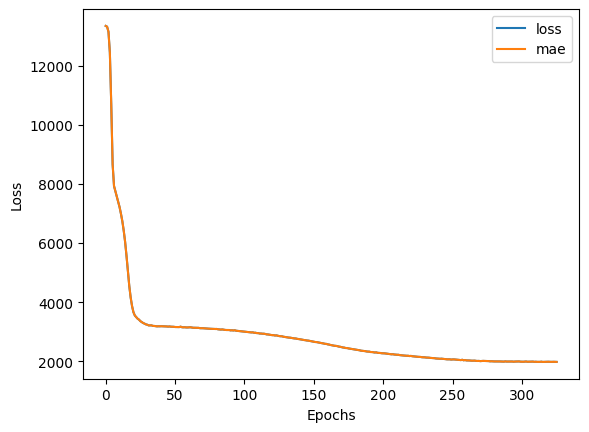

In [ ]:
pd.DataFrame(history_in_1.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

##Exercise 01.Neural network regression with TensorFlow Exercises